# Support Vector Machine (SVM)

## 선형(Linear) SVM 

- 딥러닝 이전에 분류에서 뛰어난 성능으로 가장 활용도가 높았던 분류모델
- 하나의 분류 그룹을 다른 그룹과 분리하는 최적의 경계를 찾아내는 알고리즘
- 중간크기의 데이터셋과 특성(Feature)이 많은 복잡한 데이터셋에서 성능이 좋은 것으로 알려져있다.

**선 (1)과 (2)중 어떤 선이 최적의 분류 선일까?**

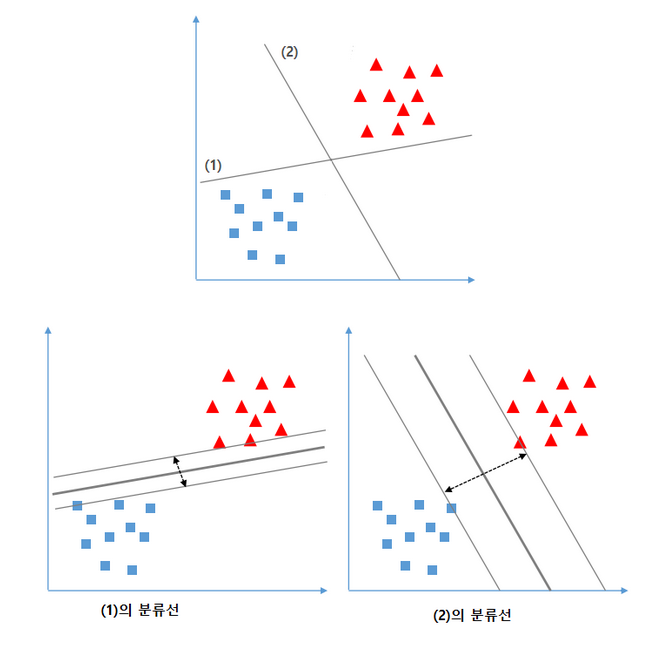

## 목표: support vector간의 가장 넓은 margin을 가지는 초평면(결정경계)를 찾는다.
> ### 초평면
> - 데이터가 존재하는 공간보다 1차원 낮은 부분공간
>    - n차원의 초평면은 n-1차원
>    - 공간을 나누기 위해 초평면을 사용한다.
>    - 1차원-점, 2차원-선, 3차원-평면, 4차원이상 초평면

- Support Vector: 경계를 찾아내는데 기준이 되는 데이터포인트. 초평면(결정경계)에 가장 가까이 있는 vector(데이터포인트)를 말한다.
- margin : 두 support vector간의 너비
- margin이 넓은 결정경계를 만드는 함수를 찾는 것.


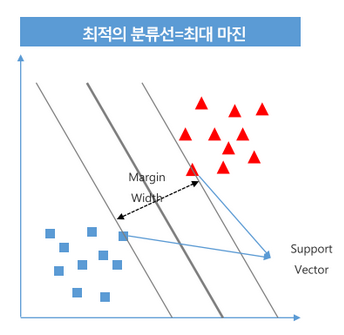

## Hard Margin, Soft Margin
- Overfitting(과적합)을 방지하기 위해 어느정도 오차를 허용하는 방식을 Soft margin이라고 한다. 반대로 오차를 허용하지 않는 방식을 Hard Margin이라고 한다.
- 모든 데이터셋이 위 그림 처럼 완전히 분류 되는 것은 아니다.
- 노이즈가 있는 데이터나 선형적으로 분리 되지 않는 경우 **하이퍼파마미터인 C** 조정해 마진을 변경한다.
- C
    - 기본값 1
    - 파라미터값을 크게주면 마진폭이 좁아져 마진 오류가 작아지나 Overfitting이 일어날 가능성이 크다.
    - 파라미터값을 작게 주면 마진폭이 넓어져 마진 오류가 크다. 훈련데이터에서는 성능이 안좋아지나 일반화(generalization)되어 테스트 데이터의 성능이 올라간다. 그러나 underfitting 이 날 가능성이 있다.


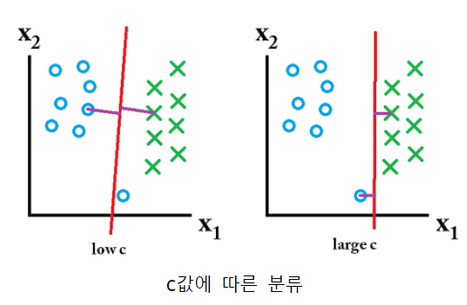

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# X_train_scaled = X_train
# X_test_scaled = X_test

In [4]:
from sklearn.svm import SVC, LinearSVC
svc = SVC(kernel='linear', random_state=1)
# svc = LinearSVC()
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=1)

In [5]:
from sklearn.metrics import accuracy_score
pred_train = svc.predict(X_train_scaled)
pred_test = svc.predict(X_test_scaled)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9906103286384976, 0.965034965034965)

In [6]:
# C값이 커질수록 hard margin => 복잡한 모델(overfitting가능성)
# C값이 작을수록 soft margin => 단순한 모델(underfitting가능성)
C_list = [0.001, 0.1, 0.5, 1, 2, 5, 10]
train_acc_list = []
test_acc_list = []
for C in C_list:
    svc = SVC(C=C, kernel='linear', random_state=1)
    svc.fit(X_train_scaled, y_train)
    pred_train = svc.predict(X_train_scaled)
    pred_test = svc.predict(X_test_scaled)
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

In [7]:
import pandas as pd
d = {
    'C':C_list,
    'Train 정확도':train_acc_list,
    'Test 정확도':test_acc_list
}
result = pd.DataFrame(d)
result

C  Train 정확도  Test 정확도
0   0.001   0.941315  0.930070
1   0.100   0.988263  0.972028
2   0.500   0.988263  0.965035
3   1.000   0.990610  0.965035
4   2.000   0.992958  0.972028
5   5.000   0.995305  0.958042
6  10.000   0.995305  0.958042

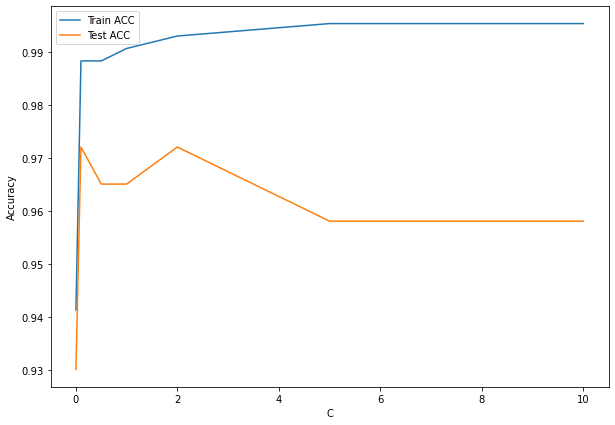

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(C_list, train_acc_list, label='Train ACC')
plt.plot(C_list, test_acc_list, label='Test ACC')

plt.xlabel('C')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

## 커널 서포트 벡터 머신
### 비선형데이터 셋에 SVM 적용
- 선형으로 분리가 안되는 경우는?
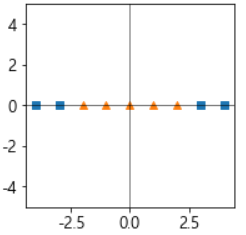

- 다항식 특성을 추가하여 차원을 늘려 선형 분리가 되도록 변환   
<center>[2차원으로 변환 $x_3=x_1^2$ 항 추가]</center>

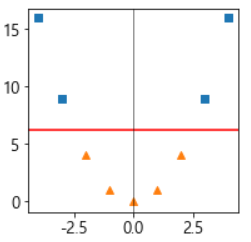

<center>[원래 공간으로 변환]</center>

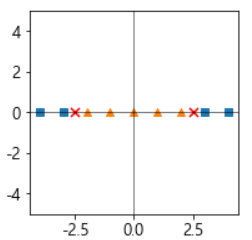

### 차원을 늘리는 경우의 문제
- 다항식 특성을 추가하는 방법은 낮은 차수의 다항식은 데이터의 패턴을 잘 표현하지 못해 과소적합이 너무 높은 차수의 다항식은 과대적합과 모델을 느리게 하는 문제가 있다.

### 커널 트릭(Kernel trick)
- 다항식을 만들기 위한 특성을 추가하지 않으면서 수학적 기교를 적용해 다항식 특성을 추가한 것과 같은 결과를 얻을 수있다.
- 이런 방식을 커널 트릭이라고 한다.

#### 방사기저(radial base function-RBF) 함수
- 커널 서포트 벡터 머신의 기본 커널 함수
- 기준점들이 되는 위치를 지정하고 각 샘플이 그 기준점들과 얼마나 떨어졌는 지를 계산한다. => 유사도(거리)
- 기준점 별 유사도 계산한 값은 원래 값보다 차원이 커지고 선형적으로 구분될 가능성이 커진다.

    
$$
\Phi(x, l) = exp\left(-\gamma \left\|x-l\right\|^2\right)
$$
<center>방사기저함수($\Phi$) x: 샘플, l: 기준값<center>

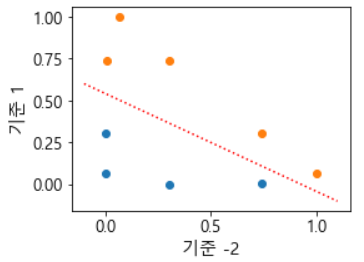
<center>$gamma=0.3, 기준점:-2,1$</center>

- ### rbf(radial basis function) 하이퍼파라미터
    - C
        - 오차 허용기준. 작은 값일 수록 많이 허용한다.
        - 과적합일 경우 값을 감소시키고, 과소적합일 경우 값을 증가 시킨다.
    - gamma 
        - 방사기저함수의 $\gamma$로 규제의 역할을 한다.
        - 모델이 과대적합일 경우 값을 감소시키고, 과소적합일 경우 값을 증가시킨다.
        

In [9]:
from sklearn.svm import SVC
# kernel:기본값 - rbf
# gamma : 작은 값일 수록 단순한 모델, 큰값일 수록 복잡한 모델
# rbf_clf = SVC(kernel='rbf', gamma=0.01, C=0.5, random_state=1)
rbf_clf = SVC(kernel='rbf', gamma=0.01, C=0.5, probability=True,random_state=1)
#probability=True : predict_proba() 함수 사용가능 (확률 조회)
rbf_clf.fit(X_train_scaled, y_train)

SVC(C=0.5, gamma=0.01, probability=True, random_state=1)

In [10]:
pred_train = rbf_clf.predict(X_train_scaled)
pred_test = rbf_clf.predict(X_test_scaled)

In [11]:
print('Train 정확도', accuracy_score(y_train, pred_train))
print('Test 정확도', accuracy_score(y_test, pred_test))

Train 정확도 0.9694835680751174
Test 정확도 0.972027972027972


In [12]:
pred_train_prob = rbf_clf.predict_proba(X_train_scaled)[:, 1]
pred_test_prob = rbf_clf.predict_proba(X_test_scaled)[:, 1]

In [13]:
from sklearn.metrics import roc_auc_score

print('Train auc score:', roc_auc_score(y_train, pred_train_prob))
print('Test auc score:', roc_auc_score(y_test, pred_test_prob))

Train auc score: 0.9950297976585871
Test auc score: 0.9951781970649896


## GridSearch로 최적의 조합찾기

In [14]:
param_grid = {
    'kernel':['linear', 'rbf'],
    'C':[0.001, 0.01, 0.1, 0.5, 1, 10, 100],
    'gamma':[0.001, 0.01, 0.1, 0.5, 1, 10, 100]
}

In [16]:
# best_param, cv_result
from sklearn.model_selection import GridSearchCV
svc = SVC()
gs = GridSearchCV(svc, 
                  param_grid=param_grid,
                  cv=5, n_jobs=-1)
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
                         'kernel': ['linear', 'rbf']})

In [17]:
gs.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

## iris DataSet으로 분류 

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

import numpy as np
import pandas as pd

In [19]:
#데이터 조회 및 분리
iris = load_iris()
X, y = iris.data, iris.target
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
print(X_train.shape, X_test.shape)

(150, 4) (150,)
(112, 4) (38, 4)


In [33]:
scaler = StandardScaler()
svc = SVC(C=1.0, gamma=0.1)
order = [
    ('scaler',scaler),
    ('svc', svc)
]
pipeline = Pipeline(order)

In [30]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=0.5, gamma=0.1))])

In [31]:
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)

In [32]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9464285714285714, 0.9736842105263158)

In [ ]:
scaler = StandardScaler()
svc = SVC(C=1.0, gamma=0.1)
order = [
    ('scaler',scaler),
    ('svc', svc)
]
pipeline = Pipeline(order)

In [35]:
param_grid = {
    'svc__C':[0.001,0.01,0.1,1,10], 
    'svc__gamma':[0.001,0.01,0.1,1,10], 
    'svc__kernel':['linear','rbf']
}

gs = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(gamma=0.1))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf']})

In [36]:
gs.best_params_

{'svc__C': 1, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}

In [37]:
result = pd.DataFrame(gs.cv_results_)
result.sort_values('rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_svc__C  \
30       0.001396      0.000489         0.000798    3.989225e-04            1   
32       0.001596      0.000489         0.000997    4.101908e-07            1   
38       0.001596      0.000489         0.000797    3.986374e-04            1   
34       0.003989      0.005007         0.000598    4.885388e-04            1   
36       0.001596      0.000490         0.000399    4.887528e-04            1   

   param_svc__gamma param_svc__kernel  \
30            0.001            linear   
32             0.01            linear   
38               10            linear   
34              0.1            linear   
36                1            linear   

                                               params  split0_test_score  \
30  {'svc__C': 1, 'svc__gamma': 0.001, 'svc__kerne...           0.956522   
32  {'svc__C': 1, 'svc__gamma': 0.01, 'svc__kernel...           0.956522   
38  {'svc__C': 1, 'svc__gamma': 10, 'svc__kernel':...           0.956522   
34  {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel'...           0.956522   
36  {'svc__C': 1, 'svc__gamma': 1, 'svc__kernel': ...           0.956522   

    split1_test_score  split2_test_score  split3_test_score  \
30           0.913043                1.0           0.909091   
32           0.913043                1.0           0.909091   
38           0.913043                1.0           0.909091   
34           0.913043                1.0           0.909091   
36           0.913043                1.0           0.909091   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
30                1.0         0.955731        0.039794                1  
32                1.0         0.955731        0.039794                1  
38                1.0         0.955731        0.039794                1  
34                1.0         0.955731        0.039794                1  
36                1.0         0.955731        0.039794                1

In [38]:
gs.score(X_test, y_test)

0.9736842105263158